<a href="https://colab.research.google.com/github/rodrigofardin/Redes-Neurais-Artificiais/blob/main/ReutersDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [ ]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )

decode_words(reuters.get_word_index(), train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Preparando o Dataset

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Construindo a rede

In [ ]:
model = keras.Sequential([
    #layers.Dense(64, activation="relu"),
    layers.Dense(96, activation="tanh"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Validando

In [ ]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]

y_val = one_hot_train_labels[:n_val]
partial_y_train = one_hot_train_labels[n_val:]    

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
     

Epoch 1/10
16/16 [==============================] - 2s 83ms/step - loss: 2.2610 - accuracy: 0.5699 - val_loss: 1.5985 - val_accuracy: 0.6450
Epoch 2/10
16/16 [==============================] - 1s 65ms/step - loss: 1.3279 - accuracy: 0.7150 - val_loss: 1.2359 - val_accuracy: 0.7260
Epoch 3/10
16/16 [==============================] - 1s 65ms/step - loss: 1.0138 - accuracy: 0.7856 - val_loss: 1.0661 - val_accuracy: 0.7770
Epoch 4/10
16/16 [==============================] - 1s 71ms/step - loss: 0.8141 - accuracy: 0.8294 - val_loss: 0.9560 - val_accuracy: 0.7990
Epoch 5/10
16/16 [==============================] - 1s 78ms/step - loss: 0.6652 - accuracy: 0.8662 - val_loss: 0.8860 - val_accuracy: 0.8120
Epoch 6/10
16/16 [==============================] - 2s 119ms/step - loss: 0.5497 - accuracy: 0.8938 - val_loss: 0.8490 - val_accuracy: 0.8200
Epoch 7/10
16/16 [==============================] - 2s 105ms/step - loss: 0.4614 - accuracy: 0.9097 - val_loss: 0.8056 - val_accuracy: 0.8280
Epoch 8/10


Plotting the Training and Validation Loss

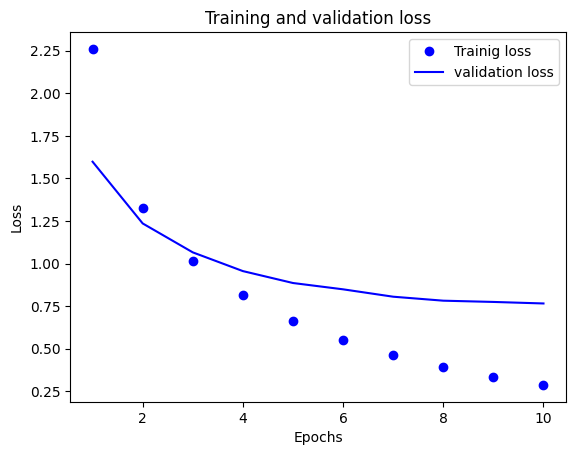

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

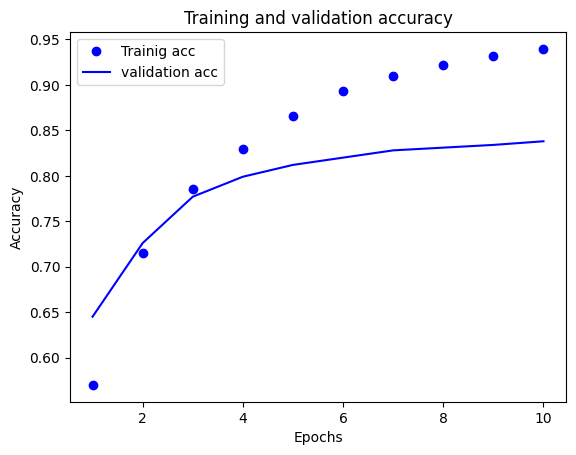

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.8343 - accuracy: 0.8068
